# Linear regression demo (for Julia v1.0)

*Denis Schluppeck* - 2017, 2018

Interactive demonstration of linear regression with some timeseries data.

## Plan

- load some data (timecourse)
- load a model (design matrix in 3 columns)
- inspect, plot and then use some interactivity to show how it works

In [3]:
# import Pkg; Pkg.add("PyPlot"); Pkg.add("Interact");

 Resolving package versions...
  Updating `~/.julia/environments/v1.0/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.0/Manifest.toml`
 [no changes]
 Resolving package versions...
 Installed Knockout ────── v0.2.0
 Installed InteractBulma ─ v0.4.2
 Installed CSSUtil ─────── v0.1.0
 Installed Interact ────── v0.9.0
 Installed InteractBase ── v0.8.1
  Updating `~/.julia/environments/v1.0/Project.toml`
  [c601a237] + Interact v0.9.0
  Updating `~/.julia/environments/v1.0/Manifest.toml`
  [bf4720bc] + AssetRegistry v0.1.0
  [70588ee8] + CSSUtil v0.1.0
  [de31a74c] + FunctionalCollections v0.4.0
  [c601a237] + Interact v0.9.0
  [d3863d7c] + InteractBase v0.8.1
  [7981ab7d] + InteractBulma v0.4.2
  [97c1335a] + JSExpr v0.3.1
  [bcebb21b] + Knockout v0.2.0
  [510215fc] + Observables v0.2.2
  [fa939f87] + Pidfile v1.1.0
  [0f1e0344] + WebIO v0.4.0
  [cc8bc4a8] + Widgets v0.4.2
  Building Knockout ─────→ `~/.julia/packages/Knockout/JIqpG/deps/build.log`
  Building InteractBase 

In [7]:
using PyPlot;
using Interact;
using DelimitedFiles;

In [8]:
# set up. read the data, design, make a time vector
timecourse = readdlm("timecourse.txt", ',', Float64);
design = readdlm("design-3.txt", ',', Float64);
t = (0:167)*1.5;

In [9]:
timecourse[1:20]

20-element Array{Float64,1}:
 213.0
 200.0
 201.0
 208.0
 207.0
 202.0
 203.0
 194.0
 190.0
 190.0
 193.0
 194.0
 194.0
 202.0
 222.0
 221.0
 217.0
 221.0
 215.0
 190.0

The first 10 elements of our model description:

In [10]:
design[1:10,:]

10×3 Array{Float64,2}:
  0.0      1.0  -1.0  
  0.0      1.0  -0.988
  0.0      1.0  -0.976
  0.0      1.0  -0.964
  0.0      1.0  -0.952
  0.0      1.0  -0.94 
  0.0      1.0  -0.928
  0.0      1.0  -0.916
 -1.0      1.0  -0.904
 -0.71335  1.0  -0.892

## Simple plot

This is a timeseries where:   

``t`` $\rightarrow$ x values and

``timecourse`` $\rightarrow$ y-values 

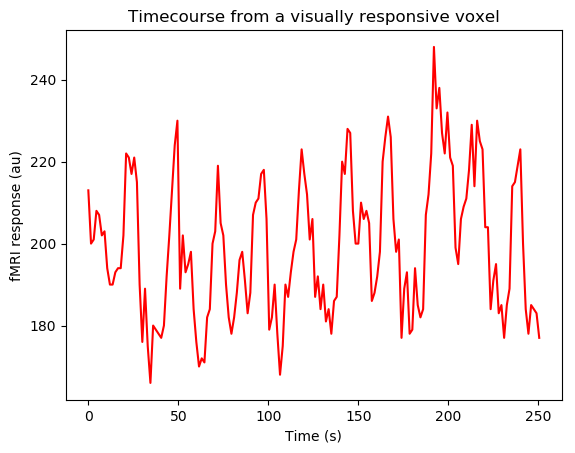

In [11]:
plot(t, timecourse, "r");
xlabel("Time (s)"); ylabel("fMRI response (au)");
title("Timecourse from a visually responsive voxel");

In [25]:
# setting up a julia expression that can be called on one line...
demoRegressFunction = :( 
    h = figure(); 
    δ=16; 
    @manipulate for a=-δ:1:δ, b=150:1:300, c=-δ:δ; withfig(h) do 
        plot(t, timecourse, color="red"), plot(t, design*[a;b;c], color="black"), axis([0, 250, 100, 300]); xlabel("Time (s)"); ylabel("fMRI reponse (image intensity)");
        sse = sum((timecourse-design*[a;b;c]).^2);
        title(sse)
    end
end
);

In [26]:
demoFunction1 = :(
    f = figure();  
    @manipulate for a=-2:0.1:2, b=-2:0.1:2, c=-1:0.1:1; withfig(f) do 
        plot(t, a*design[:,1], t, b*design[:,2],  t, c*design[:,3]), axis([0, 250, -2, 2])
        end
end
);

In [27]:
demoFunction2 = :( 
    g = figure(); 
    @manipulate for a=-2:0.1:2, b=-2:0.1:2, c=-1:0.1:1; withfig(g) do 
        plot(t, a*design[:,1] + b*design[:,2] + c*design[:,3]), axis([0, 250, -2, 2]);
        title("Linear combination of 3 columns")
        end
end 
);

There are **three** individual components of the model. 

Widget{:manipulate,Any}(OrderedDict{Symbol,Any}(:a=>Widget{:slider,Float64}(OrderedDict{Symbol,Any}(:changes=>Observable{Int64}("ob_104", 0, Any[SyncCallback(Scope("knockout-component-e61e175c-d950-4cdd-b07c-ecc495c5835d", Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :label), Any["a"], Dict{Symbol,Any}(:className=>"interact ",:style=>Dict{Any,Any}(:padding=>"5px 10px 0px 10px")), 1)], Dict{Symbol,Any}(:attributes=>Dict("style"=>"text-align:right;width:18%")), 2), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :input), Any[], Dict{Symbol,Any}(:max=>41,:min=>1,:attributes=>Dict{Any,Any}(:type=>"range",Symbol("data-bind")=>"numericValue: index, valueUpdate: 'input', event: {change : function () {this.changes(this.changes()+1)}}","orient"=>"horizontal"),:step=>1,:className=>"slider slider is-fullwidth",:style=>Dict{Any,Any}()), 0)], Dict{Symbol,Any}(:attributes=>Dict("style"=>"flex-grow:1; margin: 0 2%")), 1), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes=>Dict("data-bind"=>"text: formatted_value")), 0)], Dict{Symbol,Any}(:attributes=>Dict("style"=>"width:18%")), 1)], Dict{Symbol,Any}(:attributes=>Dict("style"=>"display:flex; justify-content:center; align-items:center;")), 7), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("formatted_vals"=>(Observable{Any}("ob_102", ["-2.0", "-1.9", "-1.8", "-1.7", "-1.6", "-1.5", "-1.4", "-1.3", "-1.2", "-1.1"  …  "1.1", "1.2", "1.3", "1.4", "1.5", "1.6", "1.7", "1.8", "1.9", "2.0"], Any[SyncCallback(Scope(#= circular reference @-6 =#), SyncCallback(Scope(#= circular reference @-7 =#), ##40#42{Scope,String}(Scope(#= circular reference @-8 =#), "formatted_vals")))]), nothing),"changes"=>(Observable{Int64}(#= circular reference @-6 =#), nothing),"formatted_value"=>(Observable{String}("ob_103", "0.0", Any[SyncCallback(Scope(#= circular reference @-6 =#), SyncCallback(Scope(#= circular reference @-7 =#), ##40#42{Scope,String}(Scope(#= circular reference @-8 =#), "formatted_value")))]), nothing),"index"=>(Observable{Any}("ob_101", 21, Any[##25#28{##70#73,Observable{Float64},Array{Function,1}}(##70#73(Box(-2.0:0.1:2.0)), Observable{Float64}("ob_100", 0.0, Any[##24#27{##68#71,Observable{Any},Array{Function,1}}(##68#71(Box(-2.0:0.1:2.0)), Observable{Any}(#= circular reference @-6 =#), Function[##24#27{##68#71,Observable{Any},Array{Function,1}}(#= circular reference @-2 =#), ##25#28{##70#73,Observable{Float64},Array{Function,1}}(#= circular reference @-5 =#)]), #g#15{##16#17{##39#42,Observable{Any}},Tuple{Observable{Float64},Observable{Float64},Observable{Float64}}}(##16#17{##39#42,Observable{Any}}(##39#42(), Observable{Any}("ob_115", Figure(PyObject <Figure size 640x480 with 1 Axes>), Any[])), (Observable{Float64}(#= circular reference @-4 =#), Observable{Float64}("ob_105", 0.0, Any[##24#27{##68#71,Observable{Any},Array{Function,1}}(##68#71(Box(-2.0:0.1:2.0)), Observable{Any}("ob_106", 21, Any[##25#28{##70#73,Observable{Float64},Array{Function,1}}(##70#73(Box(-2.0:0.1:2.0)), Observable{Float64}(#= circular reference @-6 =#), Function[##24#27{##68#71,Observable{Any},Array{Function,1}}(#= circular reference @-5 =#), ##25#28{##70#73,Observable{Float64},Array{Function,1}}(#= circular reference @-2 =#)]), SyncCallback(Scope("knockout-component-e9b1b0cf-0fa5-4d39-9eeb-a878c8487624", Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :label), Any["b"], Dict{Symbol,Any}(:className=>"interact ",:style=>Dict{Any,Any}(:padding=>"5px 10px 0px 10px")), 1)], Dict{Symbol,Any}(:attributes=>Dict("style"=>"text-align:right;width:18%")), 2), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :input), Any[], Dict{Symbol,Any}(:max=>41,:min=>1,:attributes=>Dict{Any,Any}(:type=>"range",Symbol("data-bind")=>"numericValue: index, valueUpdate: 'input', event: {change : function () {this.changes(this.changes()+1)}}","orient"=>"horizontal"),:step=>1,:className=>"slider slider is
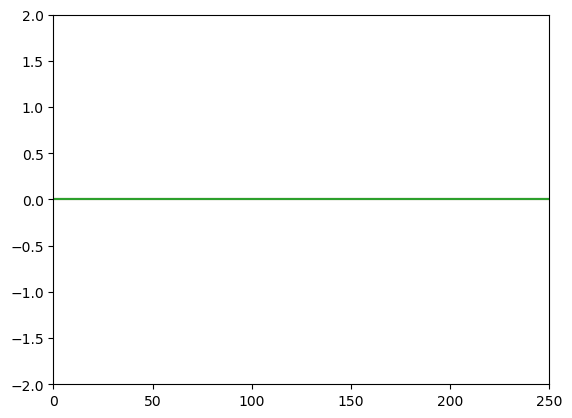
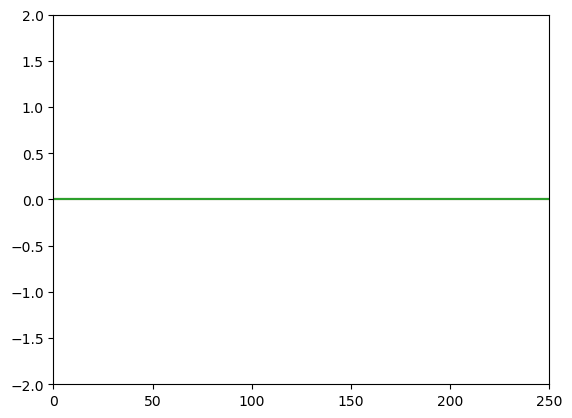

In [28]:
# run the first demo: the individual components in the model
eval(demoFunction1)

Widget{:manipulate,Any}(OrderedDict{Symbol,Any}(:a=>Widget{:slider,Float64}(OrderedDict{Symbol,Any}(:changes=>Observable{Int64}("ob_77", 0, Any[SyncCallback(Scope("knockout-component-f6b2ba3b-09fa-40f5-bf90-85570ff3a74c", Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :label), Any["a"], Dict{Symbol,Any}(:className=>"interact ",:style=>Dict{Any,Any}(:padding=>"5px 10px 0px 10px")), 1)], Dict{Symbol,Any}(:attributes=>Dict("style"=>"text-align:right;width:18%")), 2), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :input), Any[], Dict{Symbol,Any}(:max=>41,:min=>1,:attributes=>Dict{Any,Any}(:type=>"range",Symbol("data-bind")=>"numericValue: index, valueUpdate: 'input', event: {change : function () {this.changes(this.changes()+1)}}","orient"=>"horizontal"),:step=>1,:className=>"slider slider is-fullwidth",:style=>Dict{Any,Any}()), 0)], Dict{Symbol,Any}(:attributes=>Dict("style"=>"flex-grow:1; margin: 0 2%")), 1), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes=>Dict("data-bind"=>"text: formatted_value")), 0)], Dict{Symbol,Any}(:attributes=>Dict("style"=>"width:18%")), 1)], Dict{Symbol,Any}(:attributes=>Dict("style"=>"display:flex; justify-content:center; align-items:center;")), 7), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("formatted_vals"=>(Observable{Any}("ob_75", ["-2.0", "-1.9", "-1.8", "-1.7", "-1.6", "-1.5", "-1.4", "-1.3", "-1.2", "-1.1"  …  "1.1", "1.2", "1.3", "1.4", "1.5", "1.6", "1.7", "1.8", "1.9", "2.0"], Any[SyncCallback(Scope(#= circular reference @-6 =#), SyncCallback(Scope(#= circular reference @-7 =#), ##40#42{Scope,String}(Scope(#= circular reference @-8 =#), "formatted_vals")))]), nothing),"changes"=>(Observable{Int64}(#= circular reference @-6 =#), nothing),"formatted_value"=>(Observable{String}("ob_76", "0.0", Any[SyncCallback(Scope(#= circular reference @-6 =#), SyncCallback(Scope(#= circular reference @-7 =#), ##40#42{Scope,String}(Scope(#= circular reference @-8 =#), "formatted_value")))]), nothing),"index"=>(Observable{Any}("ob_74", 21, Any[##25#28{##70#73,Observable{Float64},Array{Function,1}}(##70#73(Box(-2.0:0.1:2.0)), Observable{Float64}("ob_73", 0.0, Any[##24#27{##68#71,Observable{Any},Array{Function,1}}(##68#71(Box(-2.0:0.1:2.0)), Observable{Any}(#= circular reference @-6 =#), Function[##24#27{##68#71,Observable{Any},Array{Function,1}}(#= circular reference @-2 =#), ##25#28{##70#73,Observable{Float64},Array{Function,1}}(#= circular reference @-5 =#)]), #g#15{##16#17{##27#30,Observable{Any}},Tuple{Observable{Float64},Observable{Float64},Observable{Float64}}}(##16#17{##27#30,Observable{Any}}(##27#30(), Observable{Any}("ob_88", Figure(PyObject <Figure size 640x480 with 1 Axes>), Any[])), (Observable{Float64}(#= circular reference @-4 =#), Observable{Float64}("ob_78", 0.0, Any[##24#27{##68#71,Observable{Any},Array{Function,1}}(##68#71(Box(-2.0:0.1:2.0)), Observable{Any}("ob_79", 21, Any[##25#28{##70#73,Observable{Float64},Array{Function,1}}(##70#73(Box(-2.0:0.1:2.0)), Observable{Float64}(#= circular reference @-6 =#), Function[##24#27{##68#71,Observable{Any},Array{Function,1}}(#= circular reference @-5 =#), ##25#28{##70#73,Observable{Float64},Array{Function,1}}(#= circular reference @-2 =#)]), SyncCallback(Scope("knockout-component-ce78fd49-dd52-45ac-9324-67144443ac8f", Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :label), Any["b"], Dict{Symbol,Any}(:className=>"interact ",:style=>Dict{Any,Any}(:padding=>"5px 10px 0px 10px")), 1)], Dict{Symbol,Any}(:attributes=>Dict("style"=>"text-align:right;width:18%")), 2), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :input), Any[], Dict{Symbol,Any}(:max=>41,:min=>1,:attributes=>Dict{Any,Any}(:type=>"range",Symbol("data-bind")=>"numericValue: index, valueUpdate: 'input', event: {change : function () {this.changes(this.changes()+1)}}","orient"=>"horizontal"),:step=>1,:className=>"slider slider is-fullwid
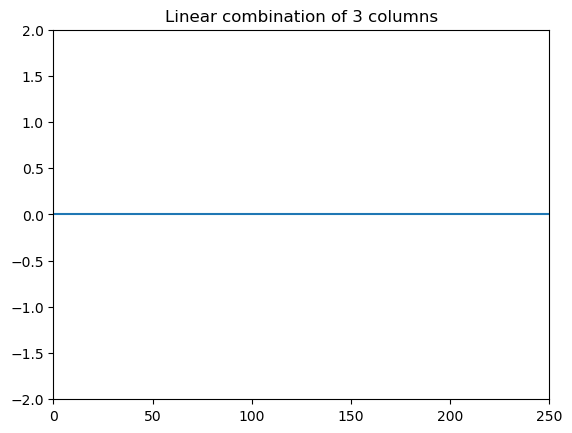
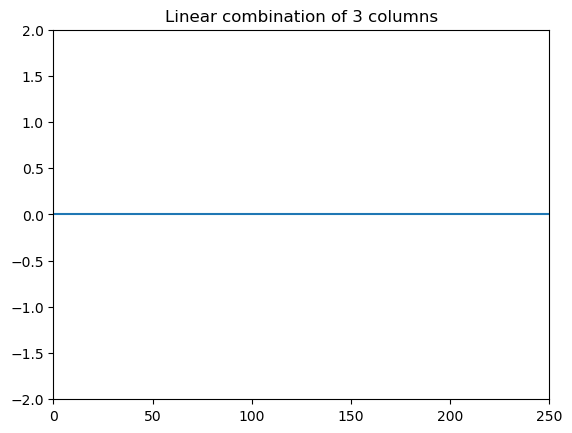

In [22]:
# run the second demo: the individual components in the model ADDED together
eval(demoFunction2)

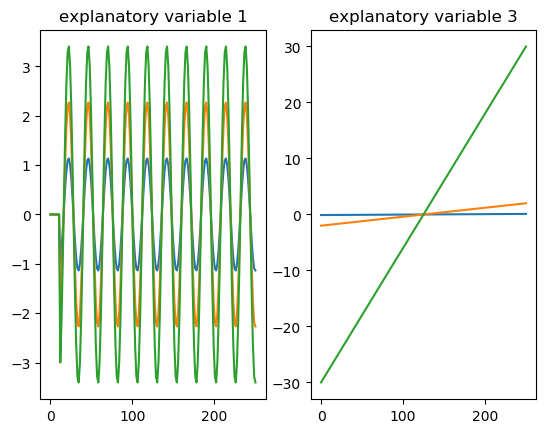

In [23]:
subplot(1,2,1)
plot(t, design[:,1] * [1;2;3]');
title("explanatory variable 1");

subplot(1,2,2)
plot(t, design[:,3] * [0.1;2;30]');
title("explanatory variable 3");

At each point in time, they simply **add** to the final result. So let's look at the **linear combination** of these three components.

To make this clearer in your mind, it might help to think of another example of *timeseries* data, e.g. temperature measurements over time: 

Adjust sliders to make the **black curve** (model) fit as closely to the **red curve** data as possible.

Widget{:manipulate,Any}(OrderedDict{Symbol,Any}(:a=>Widget{:slider,Int64}(OrderedDict{Symbol,Any}(:changes=>Observable{Int64}("ob_92", 0, Any[SyncCallback(Scope("knockout-component-7be3b9e0-1e97-4669-956b-933aa6f5ad3a", Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :label), Any["a"], Dict{Symbol,Any}(:className=>"interact ",:style=>Dict{Any,Any}(:padding=>"5px 10px 0px 10px")), 1)], Dict{Symbol,Any}(:attributes=>Dict("style"=>"text-align:right;width:18%")), 2), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :input), Any[], Dict{Symbol,Any}(:max=>16,:min=>-16,:attributes=>Dict{Any,Any}(:type=>"range",Symbol("data-bind")=>"numericValue: value, valueUpdate: 'input', event: {change : function () {this.changes(this.changes()+1)}}","orient"=>"horizontal"),:step=>1,:className=>"slider slider is-fullwidth",:style=>Dict{Any,Any}()), 0)], Dict{Symbol,Any}(:attributes=>Dict("style"=>"flex-grow:1; margin: 0 2%")), 1), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes=>Dict("data-bind"=>"text: value")), 0)], Dict{Symbol,Any}(:attributes=>Dict("style"=>"width:18%")), 1)], Dict{Symbol,Any}(:attributes=>Dict("style"=>"display:flex; justify-content:center; align-items:center;")), 7), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes"=>(Observable{Int64}(#= circular reference @-6 =#), nothing),"value"=>(Observable{Int64}("ob_91", 0, Any[SyncCallback(Scope(#= circular reference @-6 =#), SyncCallback(Scope(#= circular reference @-7 =#), ##40#42{Scope,String}(Scope(#= circular reference @-8 =#), "value"))), #g#15{##16#17{##33#36,Observable{Any}},Tuple{Observable{Int64},Observable{Int64},Observable{Int64}}}(##16#17{##33#36,Observable{Any}}(##33#36(), Observable{Any}("ob_97", Figure(PyObject <Figure size 640x480 with 1 Axes>), Any[])), (Observable{Int64}(#= circular reference @-4 =#), Observable{Int64}("ob_93", 225, Any[SyncCallback(Scope("knockout-component-34430428-cd80-47c7-8f36-e5fd980abdca", Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :label), Any["b"], Dict{Symbol,Any}(:className=>"interact ",:style=>Dict{Any,Any}(:padding=>"5px 10px 0px 10px")), 1)], Dict{Symbol,Any}(:attributes=>Dict("style"=>"text-align:right;width:18%")), 2), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :input), Any[], Dict{Symbol,Any}(:max=>300,:min=>150,:attributes=>Dict{Any,Any}(:type=>"range",Symbol("data-bind")=>"numericValue: value, valueUpdate: 'input', event: {change : function () {this.changes(this.changes()+1)}}","orient"=>"horizontal"),:step=>1,:className=>"slider slider is-fullwidth",:style=>Dict{Any,Any}()), 0)], Dict{Symbol,Any}(:attributes=>Dict("style"=>"flex-grow:1; margin: 0 2%")), 1), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes=>Dict("data-bind"=>"text: value")), 0)], Dict{Symbol,Any}(:attributes=>Dict("style"=>"width:18%")), 1)], Dict{Symbol,Any}(:attributes=>Dict("style"=>"display:flex; justify-content:center; align-items:center;")), 7), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes"=>(Observable{Int64}("ob_94", 0, Any[SyncCallback(Scope(#= circular reference @-6 =#), SyncCallback(Scope(#= circular reference @-7 =#), ##40#42{Scope,String}(Scope(#= circular reference @-8 =#), "changes")))]), nothing),"value"=>(Observable{Int64}(#= circular reference @-6 =#), nothing)), Set(String[]), nothing, Any["knockout"=>"/Users/lpzds1/.julia/packages/Knockout/JIqpG/src/../assets/knockout.js", "knockout_punches"=>"/Users/lpzds1/.julia/packages/Knockout/JIqpG/src/../assets/knockout_punches.js", "/Users/lpzds1/.julia/packages/InteractBase/Q4IkI/src/../assets/all.js", "/Users/lpzds1/.julia/packages/InteractBase/Q4IkI/src/../assets/style.css", "/Users/lpzds1/.julia/packages/InteractBulma/Ohu5Y/src/../assets/main.css"], Dict{Any,Any}("_promises"=>Dict{Any,Any}("importsLoaded"=>Any[JSString("function (ko, koPunches) {\n   
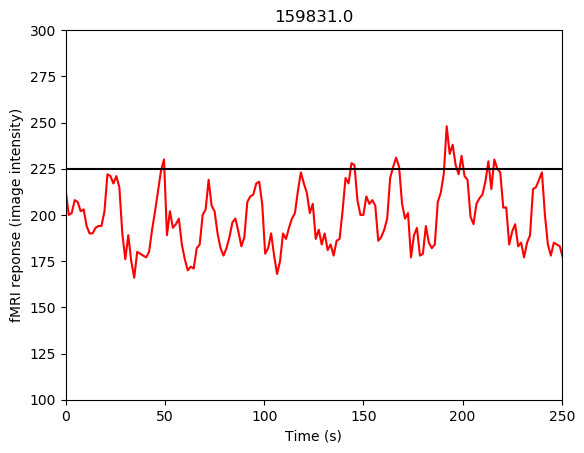
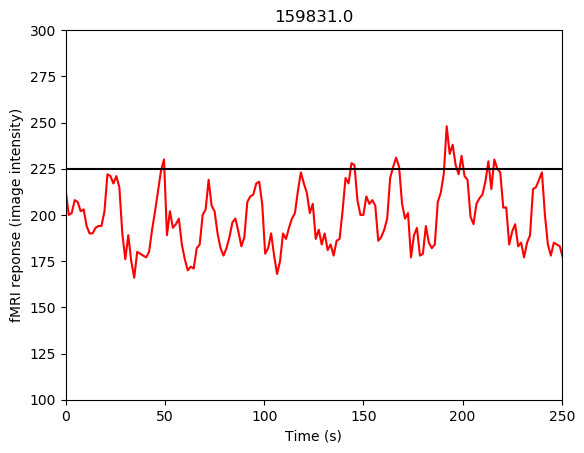

In [24]:
# interactive version of linear regression / adjusting weights
eval(demoRegressFunction)

## To find the best solution, least-squares! 

$\mathbf{y} = \mathbf{X}\mathbf{b} + \epsilon$ 

where y is data, X the design matrix ($\epsilon$ for additional noise)

$\mathbf{b} = \mathbf{X}^{\dagger}\,y$

In code this looks like this. Note the backslash ``\`` operator (not division) that solves the linear system to give you so-called $\beta$ weights



In [13]:
@show betaWeights = design\timecourse;

betaWeights = design \ timecourse = [13.0751; 199.244; 5.52676]


# Data and model on the same plot

The **model prediction** is just the **model** multiplied with the **weights** we found for each column. 

In [14]:
modelPrediction = design * betaWeights; # model prediction

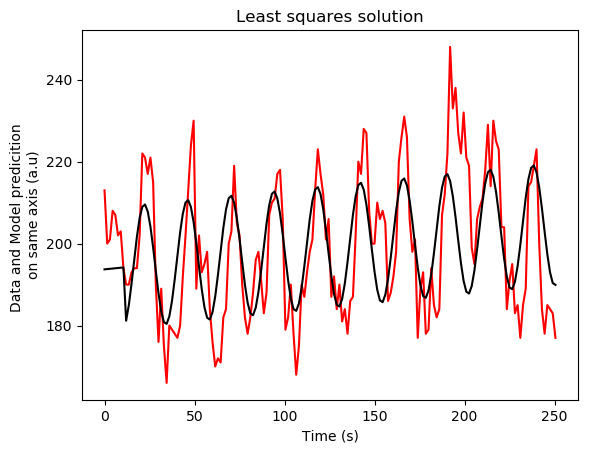

PyObject Text(0.5, 1.0, 'Least squares solution')

In [15]:
plot(t, timecourse, color="red");
# hold(true) # deprecated
plot(t, modelPrediction, color="black"); xlabel("Time (s)"); 
ylabel("Data and Model predicition \non same axis (a.u)");
title("Least squares solution")

And a look at the **residuals**...

In [16]:
residual = timecourse - modelPrediction;

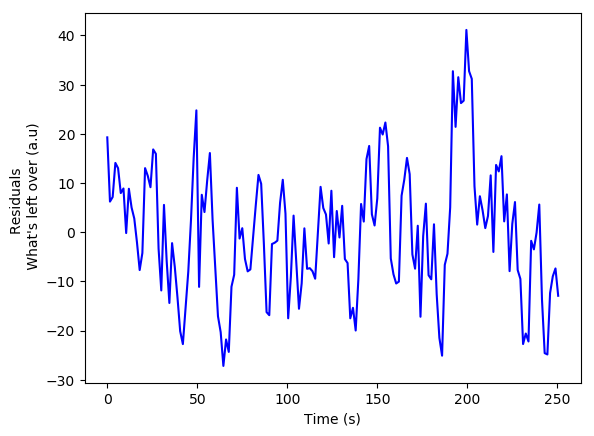

In [17]:
plot(t, residual, color="blue");
xlabel("Time (s)"); 
ylabel("Residuals \n What's left over (a.u)");

## How good is the fit?

Can look at how much is left in the *residuals* 

$\rightarrow$ ``var(resdiuals)``    $\quad$  compared to the data 

$\rightarrow$ ``var(data)``

In [18]:
@show var(residual)
@show var(timecourse)
@show r2 = 1 - var(residual)./var(timecourse)

var(residual) = 174.14069342225005
var(timecourse) = 289.73050327915604
r2 = 1 - var(residual) ./ var(timecourse) = 0.3989563009371331


0.3989563009371331